In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
!pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable


In [41]:
import numpy as np
import pandas as pd 
import seaborn as sns
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import RobustScaler

import warnings
warnings.simplefilter(action = "ignore") 


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("diyabet.csv")
df1=pd.read_csv("diyabet.csv")
df2=pd.read_csv("diyabet.csv")

Değişkenler:

Pregnancies – Hamilelik sayısı,

Glucose – Glikoz değeri,

SkinThickness – Cilt Kalınlığı,

Insulin – 2 saatlik serum insülini (mu U/ml)

Blood Pressure – Kan Basıncı (Küçük tansiyon) (mm Hg),

DiabetesPedigreeFunction– Aile öyküsüne dayalı olarak diyabet olasılığını puanlayan bir fonksiyon 

Age – Yaş (yıl),

Outcome– Hastalığa sahip (1) ya da değil (0)

Amaç: Özellikleri belirtildiğinde kişilerin diyabet hastası olup olmadıklarını 
tahmin edebilecek bir makine öğrenmesi modeli geliştirmek.

In [3]:
df

PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
0        1354778            0            171                      80   
1        1147438            8             92                      93   
2        1640031            7            115                      47   
3        1883350            9            103                      78   
4        1424119            1             85                      59   
...          ...          ...            ...                     ...   
14995    1490300           10             65                      60   
14996    1744410            2             73                      66   
14997    1742742            0             93                      89   
14998    1099353            0            132                      98   
14999    1386396            3            114                      65   

       TricepsThickness  SerumInsulin        BMI  DiabetesPedigree  Age  \
0                    34            23  43.509726          1.213191   21   
1                    47            36  21.240576          0.158365   23   
2                    52            35  41.511523          0.079019   23   
3                    25           304  29.582192          1.282870   43   
4                    27            35  42.604536          0.549542   22   
...                 ...           ...        ...               ...  ...   
14995                46           177  33.512468          0.148327   41   
14996                27           168  30.132636          0.862252   38   
14997                43            57  18.690683          0.427049   24   
14998                18           161  19.791645          0.302257   23   
14999                47           512  36.215437          0.147363   34   

       Diabetic  
0             0  
1             0  
2             0  
3             1  
4             0  
...         ...  
14995         1  
14996         1  
14997         0  
14998         0  
14999         1  

[15000 rows x 10 columns]

Veri setinde bazı gözlemlerde insülin değerleri 0 olarak girilmiş. 
Bir kişinin insülin değerinin 0 olması mümkün değildir
anlaşılan insülin değerlerine bakılmayan kişilerin insülin değerleri, 
sıfır olarak girilmiş; bunlar nan olarak değiştirilir. 
Aynı sorunun olduğu diğer columnlarda da böyle bir değişiklik yapılır.

In [4]:
df.isnull().sum()

PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

In [5]:
df[["PlasmaGlucose","DiastolicBloodPressure","TricepsThickness","SerumInsulin","BMI"]] = df[["PlasmaGlucose","DiastolicBloodPressure","TricepsThickness","SerumInsulin","BMI"]].replace(0,np.NaN)

In [6]:
df.isnull().sum()

PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

In [7]:
df.describe().T

count          mean            std           min  \
PatientID               15000.0  1.502922e+06  289253.443471  1.000038e+06   
Pregnancies             15000.0  3.224533e+00       3.391020  0.000000e+00   
PlasmaGlucose           15000.0  1.078569e+02      31.981975  4.400000e+01   
DiastolicBloodPressure  15000.0  7.122067e+01      16.758716  2.400000e+01   
TricepsThickness        15000.0  2.881400e+01      14.555716  7.000000e+00   
SerumInsulin            15000.0  1.378521e+02     133.068252  1.400000e+01   
BMI                     15000.0  3.150965e+01       9.759000  1.820051e+01   
DiabetesPedigree        15000.0  3.989677e-01       0.377944  7.804379e-02   
Age                     15000.0  3.013773e+01      12.089703  2.100000e+01   
Diabetic                15000.0  3.333333e-01       0.471420  0.000000e+00   

                                 25%           50%           75%           max  
PatientID               1.252866e+06  1.505508e+06  1.755205e+06  1.999997e+06  
Pregnancies             0.000000e+00  2.000000e+00  6.000000e+00  1.400000e+01  
PlasmaGlucose           8.400000e+01  1.040000e+02  1.290000e+02  1.920000e+02  
DiastolicBloodPressure  5.800000e+01  7.200000e+01  8.500000e+01  1.170000e+02  
TricepsThickness        1.500000e+01  3.100000e+01  4.100000e+01  9.300000e+01  
SerumInsulin            3.900000e+01  8.300000e+01  1.950000e+02  7.990000e+02  
BMI                     2.125989e+01  3.176794e+01  3.925969e+01  5.603463e+01  
DiabetesPedigree        1.377433e-01  2.002971e-01  6.162851e-01  2.301594e+00  
Age                     2.200000e+01  2.400000e+01  3.500000e+01  7.700000e+01  
Diabetic                0.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00

In [8]:
df.corr().T

PatientID  Pregnancies  PlasmaGlucose  \
PatientID                1.000000     0.006774      -0.001858   
Pregnancies              0.006774     1.000000       0.054502   
PlasmaGlucose           -0.001858     0.054502       1.000000   
DiastolicBloodPressure   0.008746     0.043528       0.007212   
TricepsThickness        -0.002406     0.063605       0.027100   
SerumInsulin            -0.020698     0.104487       0.033545   
BMI                     -0.003156     0.086386       0.020653   
DiabetesPedigree        -0.015413     0.054240       0.009057   
Age                     -0.007096     0.136972       0.038864   
Diabetic                -0.012494     0.407315       0.128004   

                        DiastolicBloodPressure  TricepsThickness  \
PatientID                             0.008746         -0.002406   
Pregnancies                           0.043528          0.063605   
PlasmaGlucose                         0.007212          0.027100   
DiastolicBloodPressure                1.000000          0.011106   
TricepsThickness                      0.011106          1.000000   
SerumInsulin                          0.022649          0.029688   
BMI                                   0.015873          0.024745   
DiabetesPedigree                      0.014099         -0.000951   
Age                                   0.041333          0.061383   
Diabetic                              0.091307          0.152505   

                        SerumInsulin       BMI  DiabetesPedigree       Age  \
PatientID                  -0.020698 -0.003156         -0.015413 -0.007096   
Pregnancies                 0.104487  0.086386          0.054240  0.136972   
PlasmaGlucose               0.033545  0.020653          0.009057  0.038864   
DiastolicBloodPressure      0.022649  0.015873          0.014099  0.041333   
TricepsThickness            0.029688  0.024745         -0.000951  0.061383   
SerumInsulin                1.000000  0.051223          0.046324  0.088007   
BMI                         0.051223  1.000000          0.028868  0.062910   
DiabetesPedigree            0.046324  0.028868          1.000000  0.055633   
Age                         0.088007  0.062910          0.055633  1.000000   
Diabetic                    0.247375  0.210508          0.170302  0.342605   

                        Diabetic  
PatientID              -0.012494  
Pregnancies             0.407315  
PlasmaGlucose           0.128004  
DiastolicBloodPressure  0.091307  
TricepsThickness        0.152505  
SerumInsulin            0.247375  
BMI                     0.210508  
DiabetesPedigree        0.170302  
Age                     0.342605  
Diabetic                1.000000

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Diabetic', ylabel='count'>

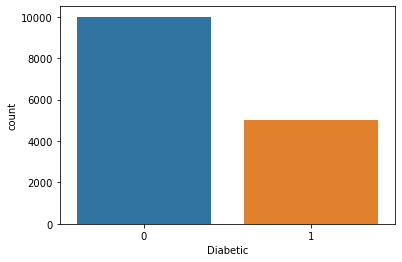

In [9]:
sns.countplot(df['Diabetic'],label="Count")

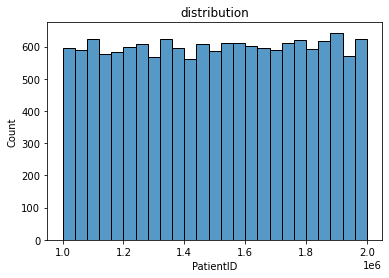

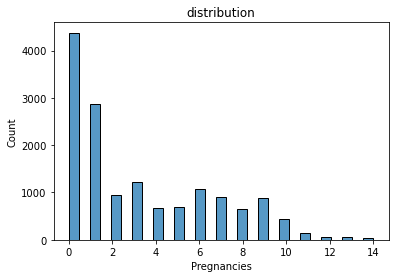

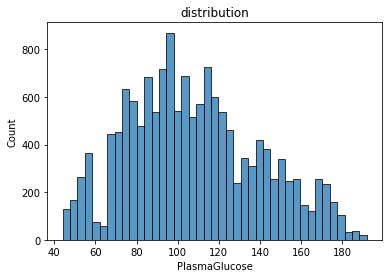

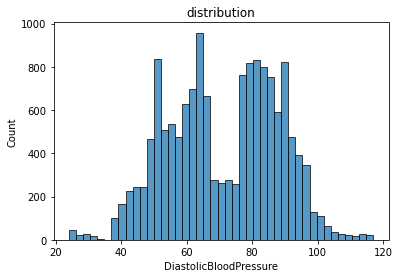

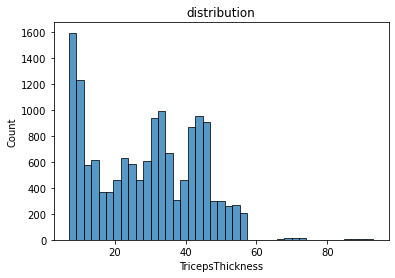

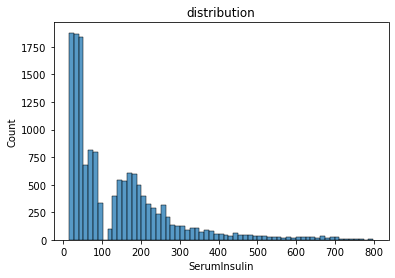

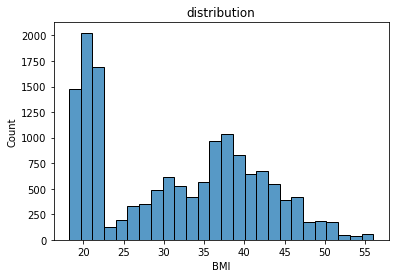

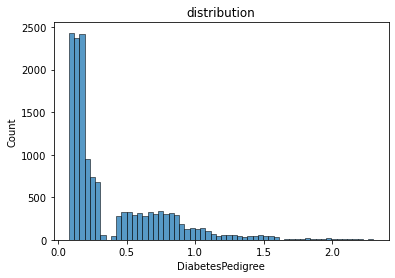

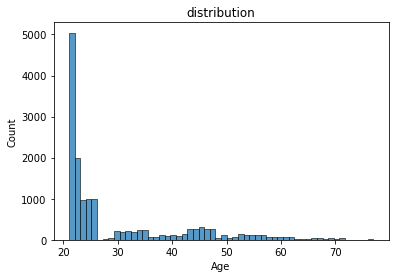

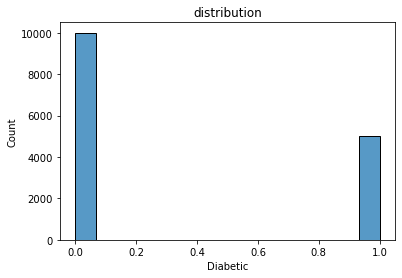

In [10]:
for i in df.columns:
    sns.histplot(x=df[i], data=df)
    plt.title("distribution")
    plt.xlabel(i)
    plt.show()

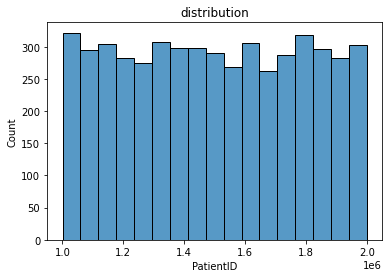

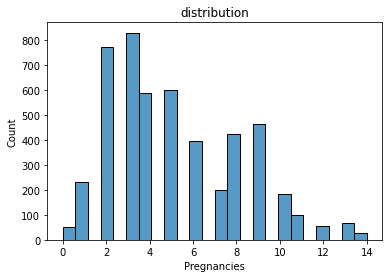

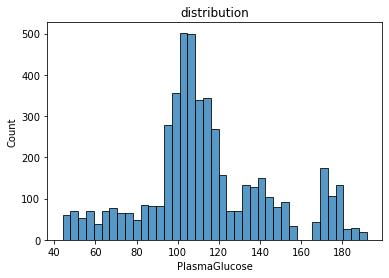

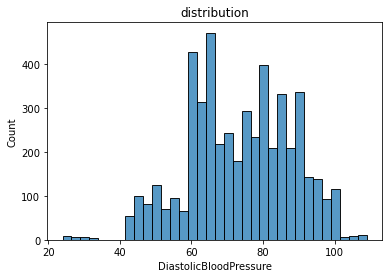

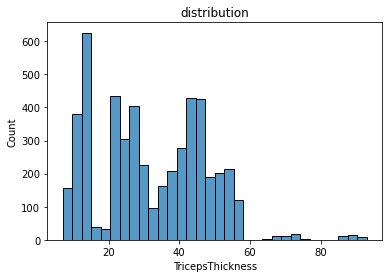

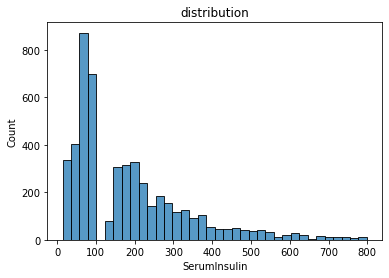

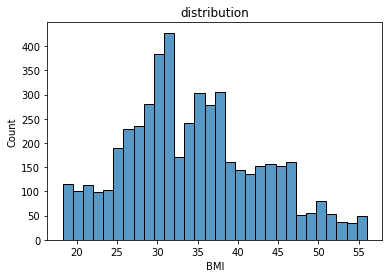

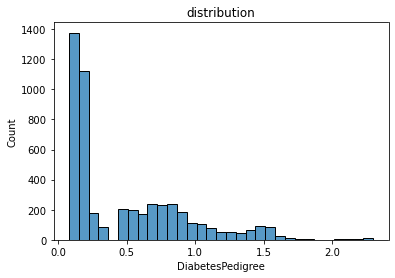

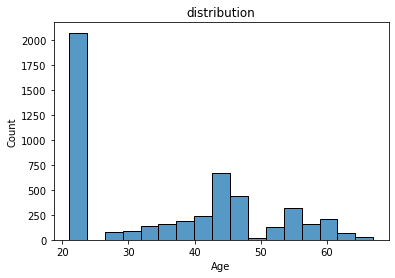

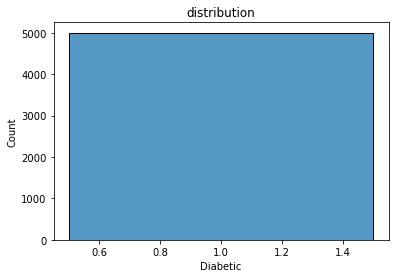

In [11]:
diabet1=df[(df["Diabetic"]==1)]

for i in diabet1.columns:
    sns.histplot(x=diabet1[i], data=diabet1)
    plt.title("distribution")
    plt.xlabel(i)
    plt.show()

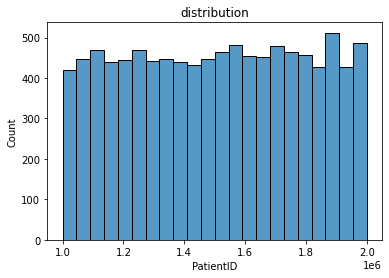

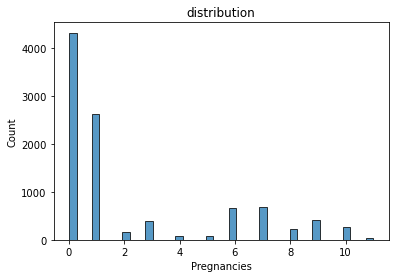

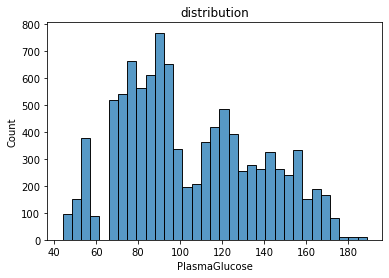

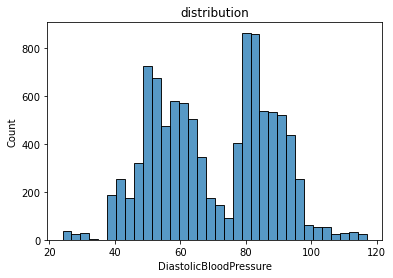

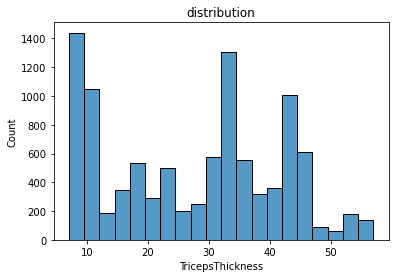

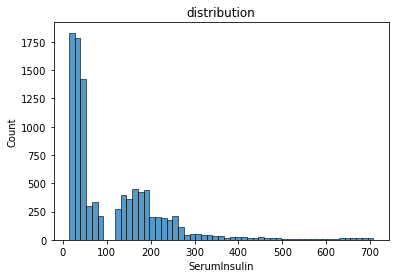

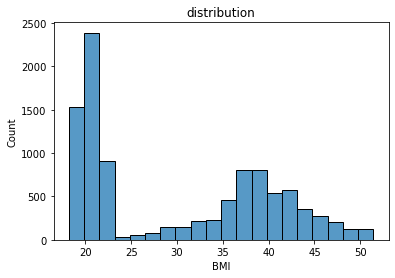

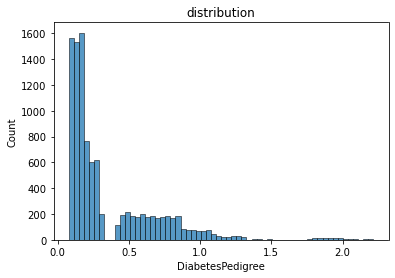

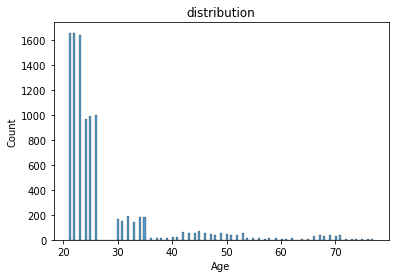

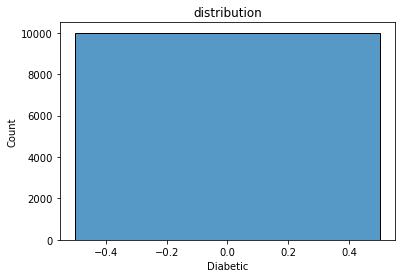

In [12]:
diabet0=df[(df["Diabetic"]==0)]

for i in diabet0.columns:
    sns.histplot(x=diabet0[i], data=diabet0)
    plt.title("distribution")
    plt.xlabel(i)
    plt.show()

In [13]:
def IQR_outliers(df, column):

     Q1 = df[column].quantile(0.25)
     Q3 = df[column].quantile(0.75)
     IQR = Q3 - Q1
     df = df.loc[lambda df: ~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
     return df
     
def Box_plots(df,clr):
  plt.figure(figsize=(10,4))
  plt.title("Box Plot")
  sns.boxplot(df, color= clr)
  plt.show()

def hist_plots(df,clr):
  plt.figure(figsize=(10,4))
  plt.hist(df, color =clr)
  plt.title("Histogram Plot")
  plt.show()

def dist_plots(df,clr):
  plt.figure(figsize=(10,4))
  plt.title("Distribution Plot")
  sns.distplot(df,color= clr)
  sns.despine()
  plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


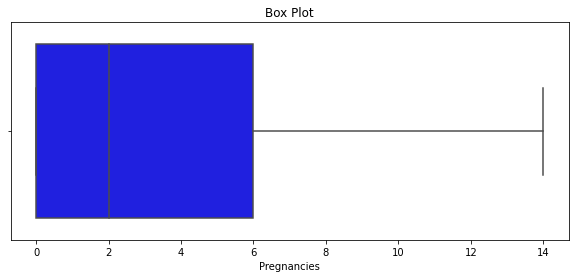

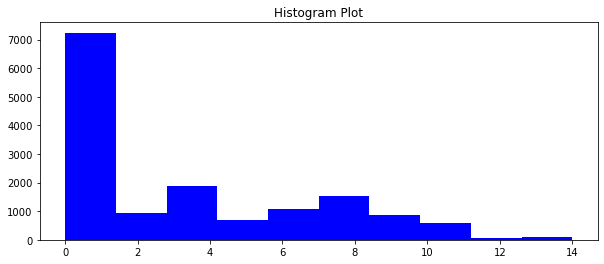

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


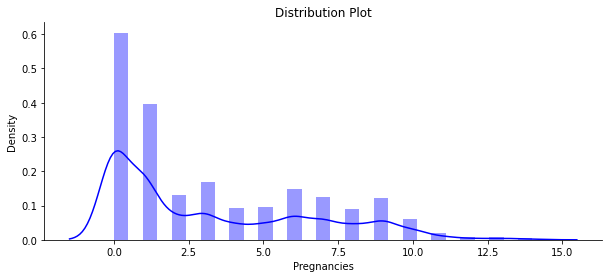

In [14]:
df2 = df2.pipe(IQR_outliers, 'Pregnancies')
Box_plots(df2["Pregnancies"],"blue")
hist_plots(df2["Pregnancies"],"blue")
dist_plots(df2["Pregnancies"],"blue")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


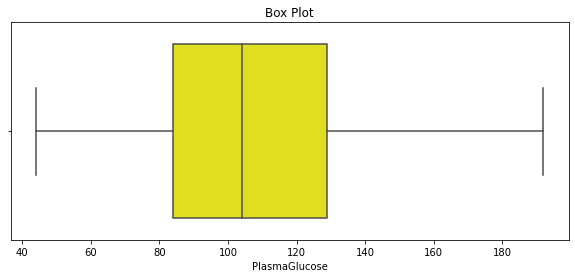

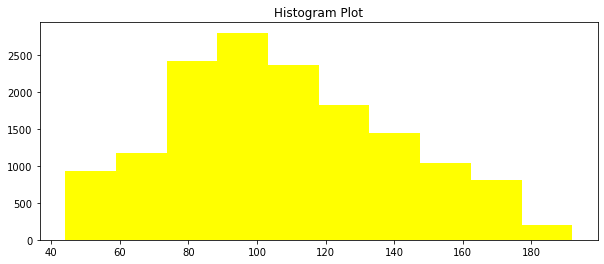

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


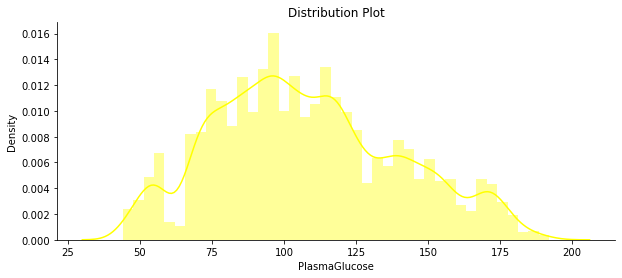

In [15]:
df2 = df2.pipe(IQR_outliers, 'PlasmaGlucose')
Box_plots(df2["PlasmaGlucose"],"yellow")
hist_plots(df2["PlasmaGlucose"],"yellow")
dist_plots(df2["PlasmaGlucose"],"yellow")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


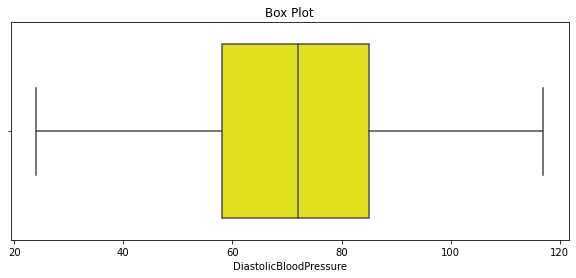

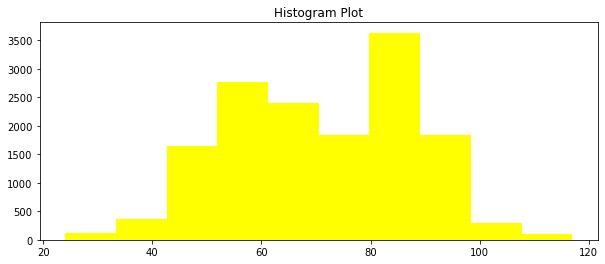

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


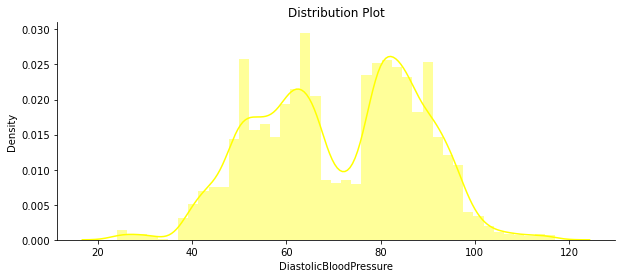

In [16]:
df2 = df2.pipe(IQR_outliers, 'DiastolicBloodPressure')
Box_plots(df2["DiastolicBloodPressure"],"yellow")
hist_plots(df2["DiastolicBloodPressure"],"yellow")
dist_plots(df2["DiastolicBloodPressure"],"yellow")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


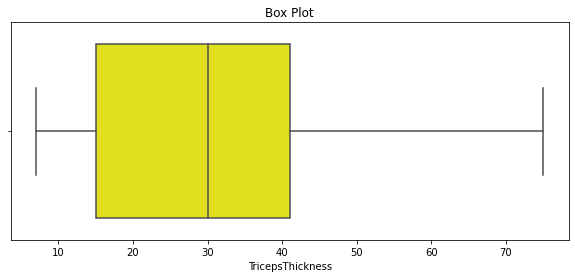

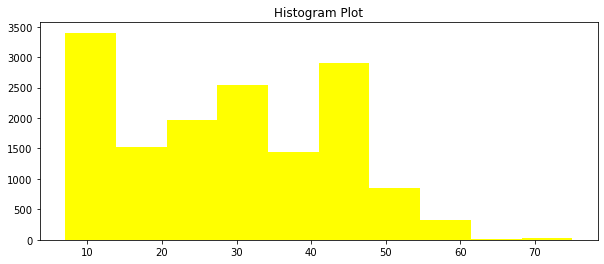

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


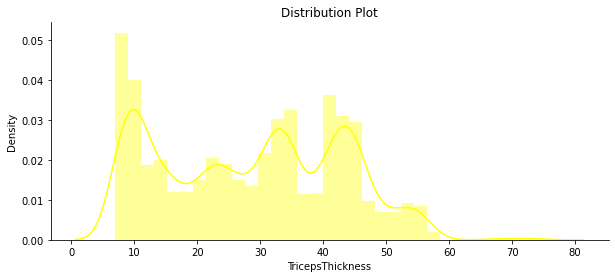

In [17]:
df2 = df2.pipe(IQR_outliers, 'TricepsThickness')
Box_plots(df2["TricepsThickness"],"yellow")
hist_plots(df2["TricepsThickness"],"yellow")
dist_plots(df2["TricepsThickness"],"yellow")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


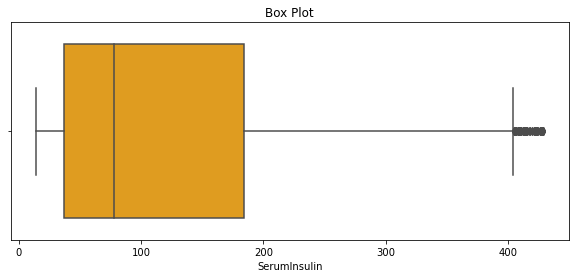

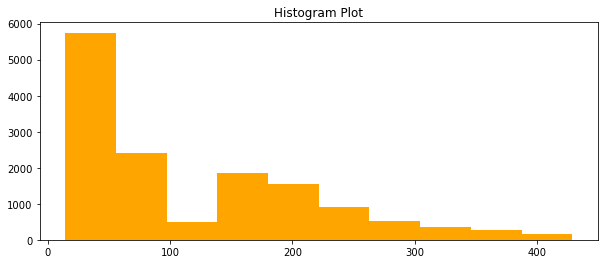

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


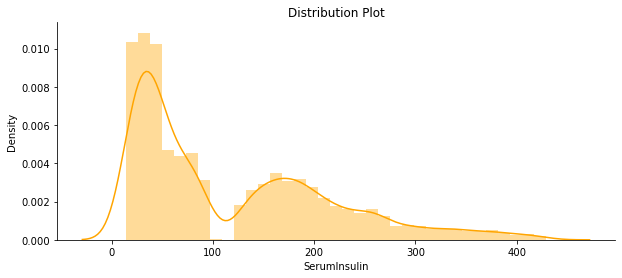

In [18]:
df2 = df2.pipe(IQR_outliers, 'SerumInsulin')
Box_plots(df2["SerumInsulin"],"orange")
hist_plots(df2["SerumInsulin"],"orange")
dist_plots(df2["SerumInsulin"],"orange")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


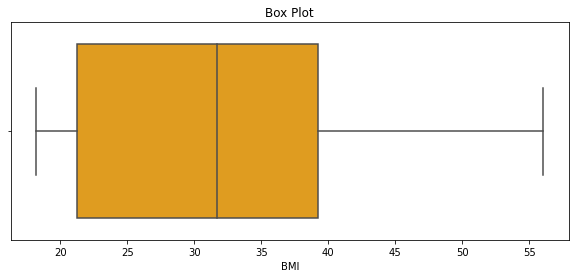

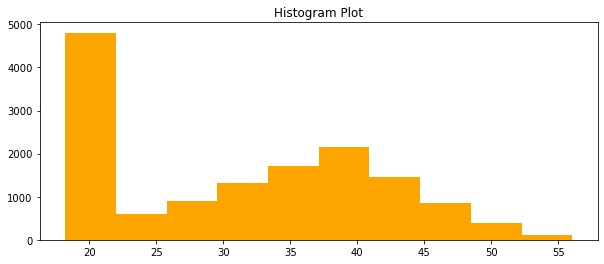

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


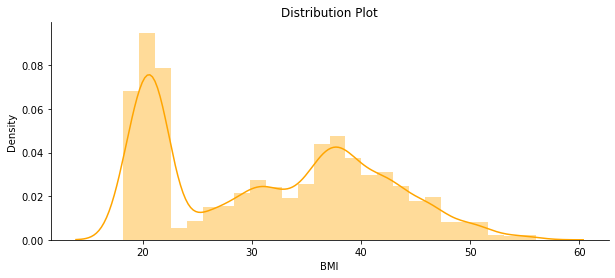

In [19]:
df2 = df2.pipe(IQR_outliers, 'BMI')
Box_plots(df2["BMI"],"orange")
hist_plots(df2["BMI"],"orange")
dist_plots(df2["BMI"],"orange")

In [20]:
df2.shape

(14306, 10)

In [21]:
def IQR_imputation(df, column):

     Q1 = df[column].quantile(0.25)
     Q3 = df[column].quantile(0.75)
     IQR = Q3 - Q1
     df.loc[((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))), column] = np.mean(df[column])
     return df

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


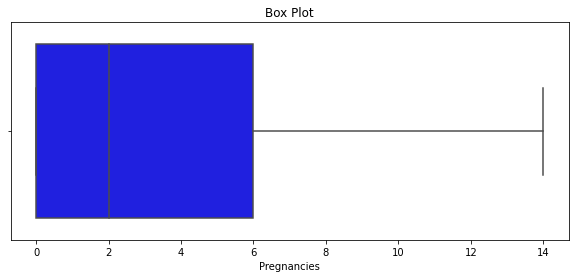

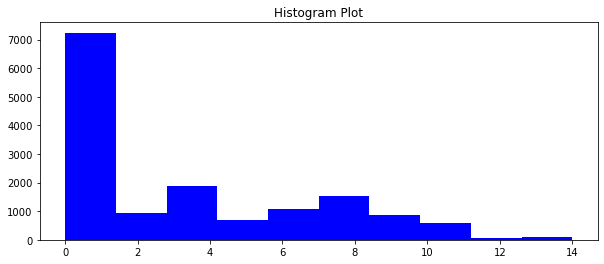

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


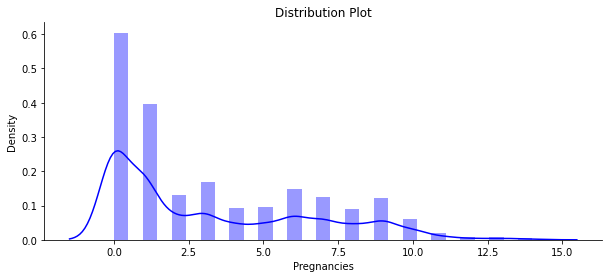

In [22]:
df1 = df1.pipe(IQR_imputation, 'Pregnancies')
Box_plots(df1["Pregnancies"],"blue")
hist_plots(df1["Pregnancies"],"blue")
dist_plots(df1["Pregnancies"],"blue")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


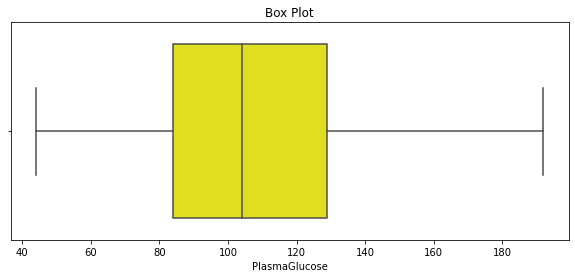

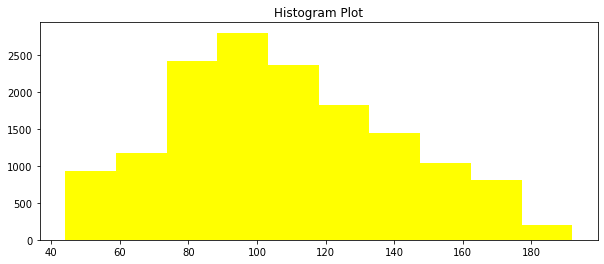

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


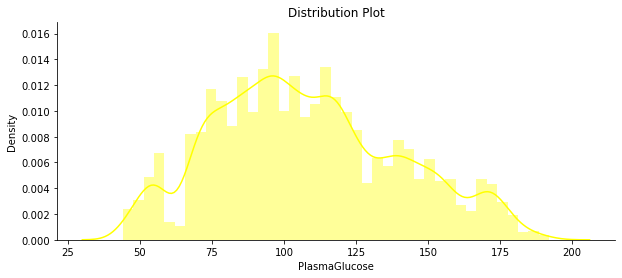

In [23]:
df1 = df1.pipe(IQR_imputation, 'PlasmaGlucose')
Box_plots(df1["PlasmaGlucose"],"yellow")
hist_plots(df1["PlasmaGlucose"],"yellow")
dist_plots(df1["PlasmaGlucose"],"yellow")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


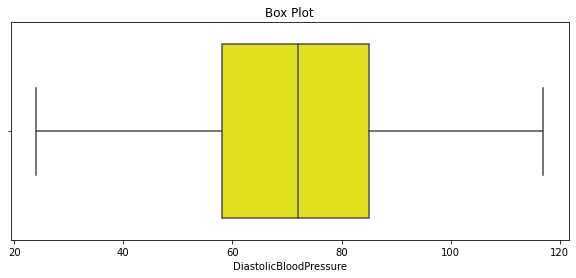

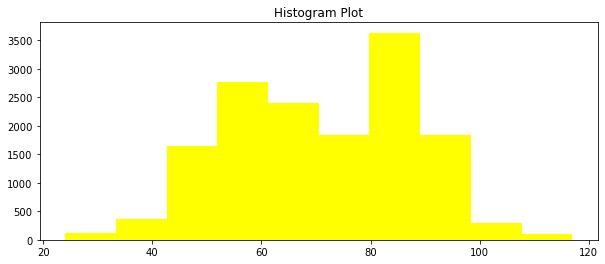

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


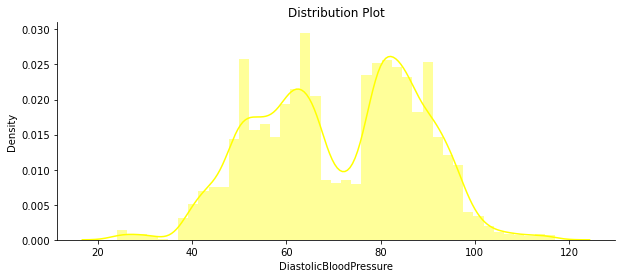

In [24]:
df1 = df1.pipe(IQR_imputation, 'DiastolicBloodPressure')
Box_plots(df1["DiastolicBloodPressure"],"yellow")
hist_plots(df1["DiastolicBloodPressure"],"yellow")
dist_plots(df1["DiastolicBloodPressure"],"yellow")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


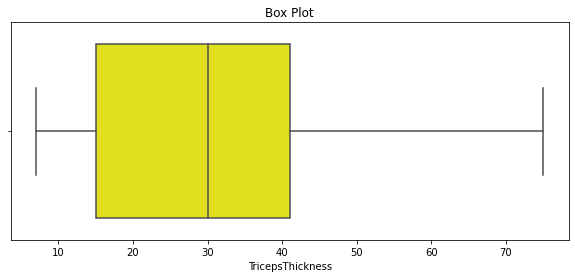

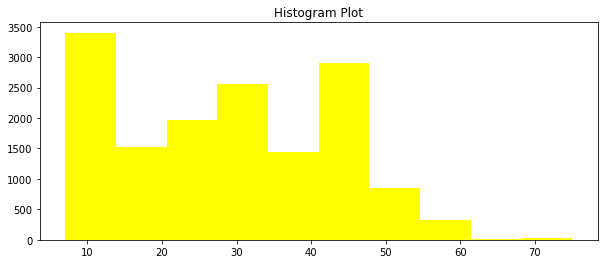

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


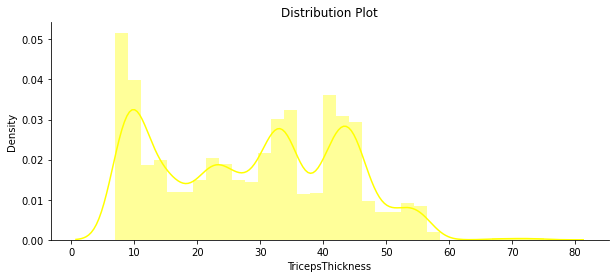

In [25]:
df1 = df1.pipe(IQR_imputation, 'TricepsThickness')
Box_plots(df1["TricepsThickness"],"yellow")
hist_plots(df1["TricepsThickness"],"yellow")
dist_plots(df1["TricepsThickness"],"yellow")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


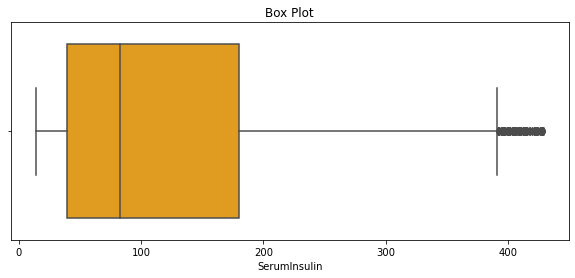

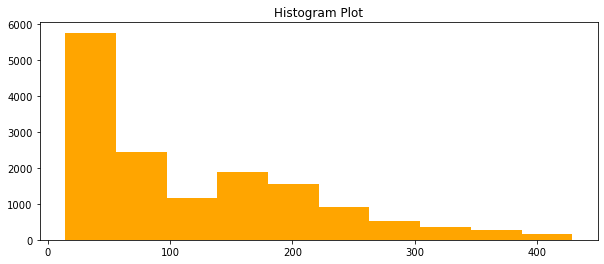

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


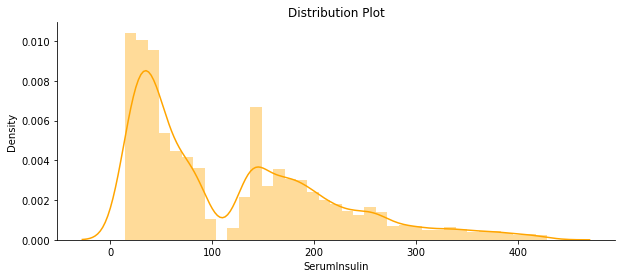

In [26]:
df1 = df1.pipe(IQR_imputation, 'SerumInsulin')
Box_plots(df1["SerumInsulin"],"orange")
hist_plots(df1["SerumInsulin"],"orange")
dist_plots(df1["SerumInsulin"],"orange")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


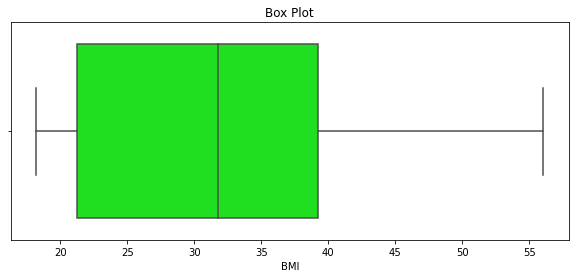

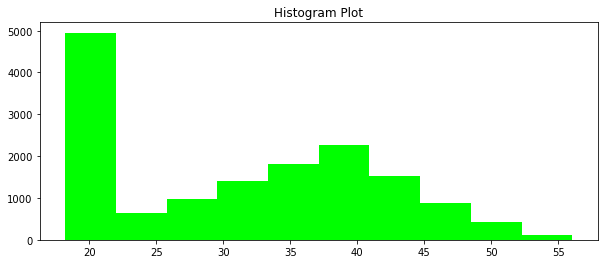

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


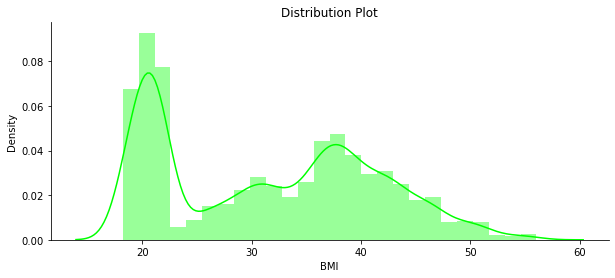

In [27]:
df1 = df1.pipe(IQR_imputation, 'BMI')
Box_plots(df1["BMI"],"lime")
hist_plots(df1["BMI"],"lime")
dist_plots(df1["BMI"],"lime")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


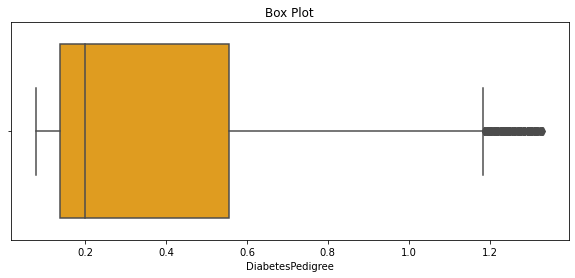

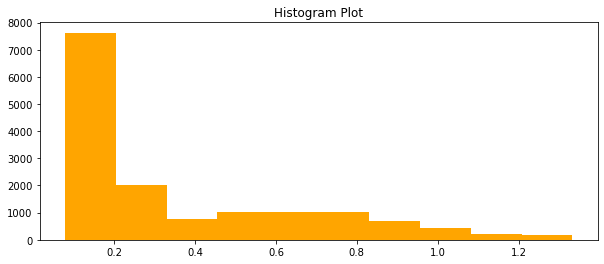

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


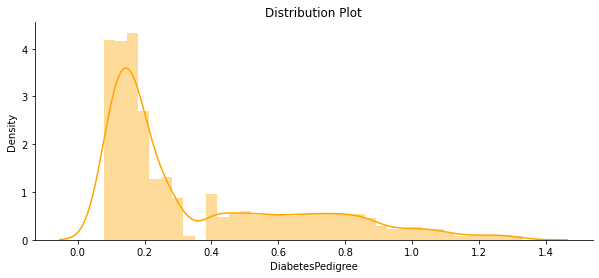

In [28]:
df1 = df1.pipe(IQR_imputation, 'DiabetesPedigree')
Box_plots(df1["DiabetesPedigree"],"orange")
hist_plots(df1["DiabetesPedigree"],"orange")
dist_plots(df1["DiabetesPedigree"],"orange")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


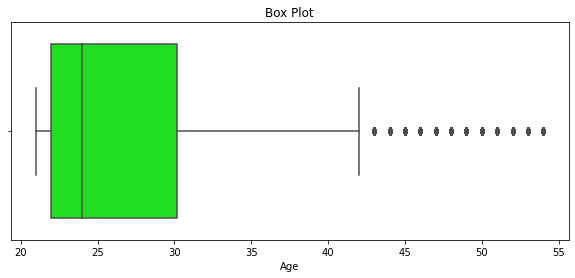

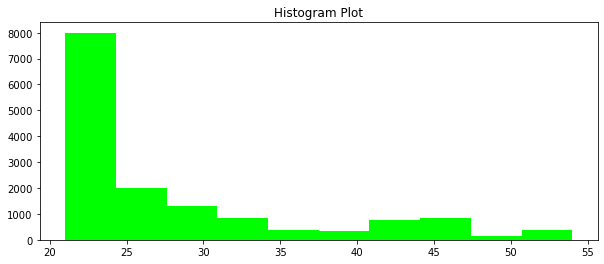

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


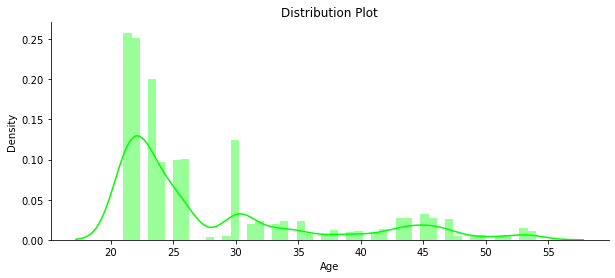

In [29]:
df1 = df1.pipe(IQR_imputation, 'Age')
Box_plots(df1["Age"],"lime")
hist_plots(df1["Age"],"lime")
dist_plots(df1["Age"],"lime")

In [30]:
df1.shape

(15000, 10)

In [37]:
y = df2["Diabetic"]
X = df2.drop(["Diabetic"], axis = 1)
log_model = LogisticRegression().fit(X,y)
y_pred = log_model.predict(X)
print(accuracy_score(y, y_pred))
print(classification_report(y, y_pred))

0.6804138123864113
              precision    recall  f1-score   support

           0       0.68      1.00      0.81      9734
           1       0.00      0.00      0.00      4572

    accuracy                           0.68     14306
   macro avg       0.34      0.50      0.40     14306
weighted avg       0.46      0.68      0.55     14306



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
df=df.drop(["PatientID"],axis=1)

In [49]:
df1=df1.drop(["PatientID"],axis=1)
df2=df2.drop(["PatientID"],axis=1)

In [43]:
y = df2["Diabetic"]
X = df2.drop(["Diabetic"], axis = 1)



models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', GradientBoostingClassifier()))
models.append(("LightGBM", LGBMClassifier()))

# evaluate each model in turn
results = []
names = []



for name, model in models:
    
        kfold = KFold(n_splits = 10)
        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        

LR: 0.680414 (0.000255)
KNN: 0.627357 (0.009705)
CART: 0.898504 (0.007218)
RF: 0.937927 (0.005895)
SVM: 0.680414 (0.000255)
XGB: 0.949601 (0.004142)
LightGBM: 0.956732 (0.005959)


In [44]:
y = df1["Diabetic"]
X = df.drop(["Diabetic"], axis = 1)



models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', GradientBoostingClassifier()))
models.append(("LightGBM", LGBMClassifier()))

# evaluate each model in turn
results = []
names = []



for name, model in models:
    
        kfold = KFold(n_splits = 10)
        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        

LR: 0.666667 (0.000000)
KNN: 0.610533 (0.010786)
CART: 0.894200 (0.008143)
RF: 0.935333 (0.005383)
SVM: 0.666667 (0.000000)
XGB: 0.946867 (0.004918)
LightGBM: 0.955067 (0.004533)


In [50]:
y = df["Diabetic"]
X = df.drop(["Diabetic"], axis = 1)



models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', GradientBoostingClassifier()))
models.append(("LightGBM", LGBMClassifier()))

# evaluate each model in turn
results = []
names = []



for name, model in models:
    
        kfold = KFold(n_splits = 10)
        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        

LR: 0.777733 (0.012394)
KNN: 0.844600 (0.009768)
CART: 0.901333 (0.005506)
RF: 0.939267 (0.006048)
SVM: 0.666800 (0.000267)
XGB: 0.949933 (0.004346)
LightGBM: 0.956667 (0.004570)


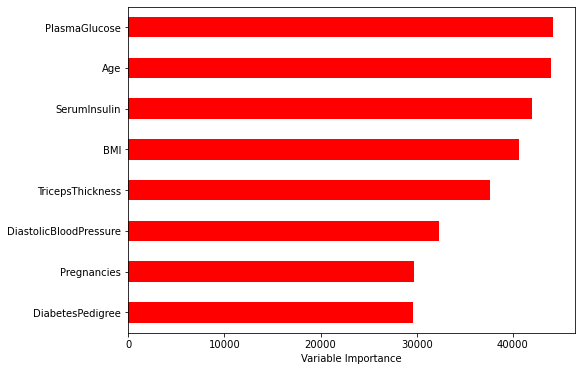

In [51]:
Importance = pd.DataFrame({'Importance':LGBMClassifier().fit(X, y).feature_importances_*100}, 
                          index = X.columns)

Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', figsize=(8,6))

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [54]:
#df3=df.copy()
#df3["SerumInsulin/Age"]=df3["SerumInsulin"]/df3["Age"]
#df3["BMI/Age"]=df3["BMI"]/df3["Age"]
#df3["Pregnancies/Age"]=df3["Pregnancies"]/df3["Age"]
#df3["Ins*Glu"]=df3["SerumInsulin"]* df3["PlasmaGlucose"]

#df3=df3.drop(["Age"], axis=1)

In [56]:
""""y = df3["Diabetic"]
X = df3.drop(["Diabetic"], axis = 1)

models = []
models.append(('XGB', GradientBoostingClassifier()))
models.append(("LightGBM", LGBMClassifier()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    
        kfold = KFold(n_splits = 10)
        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        """"

XGB: 0.941733 (0.004678)
LightGBM: 0.950600 (0.004325)


Pregnancies  PlasmaGlucose  DiastolicBloodPressure  TricepsThickness  \
0                0            171                      80                34   
1                8             92                      93                47   
2                7            115                      47                52   
3                9            103                      78                25   
4                1             85                      59                27   
5                0             82                      92                 9   
6                0            133                      47                19   
7                0             67                      87                43   
8                8             80                      95                33   
9                1             72                      31                40   
10               1             88                      86                11   
11               3             94                      96                31   
12               5            114                     101                43   
13               7            110                      82                16   
14               0            148                      58                11   
15               3            109                      77                46   
16               3            106                      64                25   
17               1            156                      53                15   
18               8            117                      39                32   
19               3            102                     100                25   
20               0             92                      84                 8   
21               0            118                      95                 7   
22               1             82                      55                18   
23               1            124                      82                42   
24               2             44                      81                46   
25               9            104                      68                42   
26               6            135                      91                31   
27               3            163                      87                42   
28               0            119                      50                52   
29               0             70                      64                 9   
30              11             75                      89                 8   
31               8            152                      83                42   
32               0            149                      50                 8   
33               3            123                      61                29   
34               2             74                      87                33   
35               7             45                      66                44   
36               3            152                      47                44   
37               0             85                      81                31   
38               2            104                      77                47   
39               7            108                      95                10   
40               2            118                      61                56   
41               1             85                      80                35   
42               0            148                      69                11   
43               0             76                      85                25   
44               5            104                      52                41   
45               2            165                      64                 7   
46               5            117                      95                26   
47               9            104                      51                 7   
48               6             73                      61                35   
49               4            115                      50

In [57]:
def lof(dataframe, n,c, numlist, plot_xlim,thr):
    clf=LocalOutlierFactor(n_neighbors=n, contamination=c)
    clf.fit_predict(dataframe[numlist])
    df_scores= clf.negative_outlier_factor_
    threshold=np.sort(df_scores)[thr]
    print(np.sort(df_scores)[0:50])
    pd.DataFrame(np.sort(df_scores)).plot(stacked=True,xlim=[0,plot_xlim], style=".-");
    plt.show()
    return df_scores,threshold 

[-2.33272701 -2.09798404 -2.04982744 -2.0404935  -1.96343747 -1.96291017
 -1.88600521 -1.87383248 -1.86615397 -1.85387354 -1.84881162 -1.84730046
 -1.8252492  -1.82070162 -1.81358638 -1.76448323 -1.71971068 -1.70220795
 -1.70073168 -1.68958521 -1.65538049 -1.65307893 -1.62996765 -1.62581825
 -1.62518251 -1.61183941 -1.61173869 -1.60067414 -1.59850641 -1.5909557
 -1.58460419 -1.57210943 -1.56824527 -1.56416691 -1.56398833 -1.55082107
 -1.54795132 -1.54774354 -1.54225001 -1.5362559  -1.53252996 -1.53227626
 -1.53047497 -1.52269575 -1.52088258 -1.51482645 -1.51172908 -1.5078694
 -1.50771585 -1.50033391]


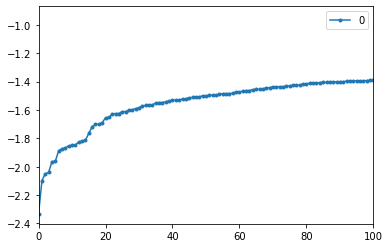

In [59]:
cols=[col for col in df.columns if col!="Diabetic"]
scores, threshold =lof(df, 20, 0.1, cols, 100,50)

In [60]:
df3=df.drop(df[scores< threshold].index, axis=0).reset_index(drop=True)

In [62]:
y = df3["Diabetic"]
X = df3.drop(["Diabetic"], axis = 1)

models = []
models.append(('XGB', GradientBoostingClassifier()))
models.append(("LightGBM", LGBMClassifier()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    
        kfold = KFold(n_splits = 10)
        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        

XGB: 0.950569 (0.005454)
LightGBM: 0.957191 (0.006152)


In [64]:
# Overfit var mı?
y = df3["Diabetic"]
X = df3.drop(["Diabetic"], axis = 1)
log_model = LGBMClassifier().fit(X,y)
y_pred = log_model.predict(X)
print(accuracy_score(y, y_pred))
print(classification_report(y, y_pred))

0.9812709030100334
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      9986
           1       0.97      0.97      0.97      4964

    accuracy                           0.98     14950
   macro avg       0.98      0.98      0.98     14950
weighted avg       0.98      0.98      0.98     14950



In [90]:
y = df["Diabetic"]
x = df.drop("Diabetic", axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

print(f"{x_train.shape}, {x_test.shape}, {y_train.shape}, {y_test.shape}")

(12000, 8), (3000, 8), (12000,), (3000,)


In [95]:
cls = LGBMClassifier()

model = cls.fit(x_train, y_train)
proba = model.predict_proba(x_test)[:, 1]
pred = model.predict(x_test)
print(f"AUC: {roc_auc_score(y_test, proba)}\nACCURACY: {accuracy_score(y_test, pred)}\nPRESICION: {precision_score(y_test, pred)}\nRECALL: {recall_score(y_test, pred)}")

AUC: 0.9913652102624428
ACCURACY: 0.9543333333333334
PRESICION: 0.9380804953560371
RECALL: 0.9219066937119675


In [96]:
# Model Get Params
model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [97]:
# Model Tunning
cart_model = LGBMClassifier(random_state=17)

# arama yapılacak hiperparametre setleri
cart_params = {'max_depth': range(1, 11),
               "min_samples_split": range(1, 16)}


cart_cv = GridSearchCV(cart_model, cart_params, cv=5, n_jobs=-1, verbose=True)
cart_cv.fit(x_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[LightGBM] [Warning] Unknown parameter: min_samples_split


GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=17), n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'min_samples_split': range(1, 16)},
             verbose=True)

In [98]:
# Final Model
cart_tuned = LGBMClassifier(**cart_cv.best_params_).fit(x_train, y_train)
y_pred = cart_tuned.predict(x_test)
y_prob = cart_tuned.predict_proba(x_test)[:, 1]
print(f"AUC: {roc_auc_score(y_test, y_prob)}\nACCURACY: {accuracy_score(y_test, y_pred)}\nPRESICION: {precision_score(y_test, y_pred)}\nRECALL: {recall_score(y_test, y_pred)}")

AUC: 0.9904940266008125
ACCURACY: 0.953
PRESICION: 0.9351184346035015
RECALL: 0.920892494929006
